# Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter,OrderedDict
import operator
pd.set_option('mode.chained_assignment', None)

In [2]:
#Getting the data
df_data=pd.read_csv("startup_funding.csv",encoding='UTF-8',skipinitialspace=True)

In [3]:
df_data.dropna(subset=['InvestorsName'], how='all', inplace = True)
df_data.describe()

,SNo
count,2364.000000
mean,1185.004230
std,684.596294
min,0.000000
25%,592.750000
50%,1183.500000
75%,1778.250000
max,2371.000000


In [4]:
df_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


# 1. The correct location for startup

In [5]:
#Copying the Data into other Dataframe for the analysis
data_1=df_data
data_1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [6]:
#Correcting the name of the City
'''In the Provided Dataset there are various spelling or mistype mistake is present, so in order to handle it we need to 
deal with the name and replace it with the original name'''

data_1['CityLocation'].replace('Delhi','New Delhi',inplace=True)
data_1['CityLocation'].replace('bangalore','Bangalore',inplace=True)
data_1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [7]:
#Getting all the first City name
'''As in CityLocation Features some entries are with the both city name followed with the state name or country name,
so in order to perform the analysis on only city we need to extract the city names from the feature'''

data_1['CityLocation']=data_1['CityLocation'].str.split(' /').str[0]
data_1['CityLocation']=data_1['CityLocation'].str.split('/').str[0]
data_1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [8]:
#Creating the dataset for given city
'''Creating new dataset in order to perform analysis'''

data_2=data_1[(data_1['CityLocation']=='Bangalore') | (data_1['CityLocation']=='New Delhi') | (data_1['CityLocation']=='Gurgaon') | (data_1['CityLocation']=='Mumbai') | (data_1['CityLocation']=='Noida')  ]

In [9]:
#Best city for startup
dictionary=data_2['CityLocation'].value_counts()
dictionary.head(1)

Bangalore    634
Name: CityLocation, dtype: int64

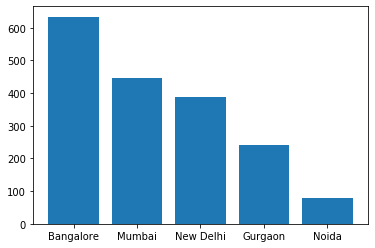

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida'], dtype='object')


In [10]:
plt.bar(dictionary.index,dictionary.values)
plt.show()
print(dictionary.index)

# 2.The list of top 5 investors from dataset

In [11]:
#Getting Dictionary of all investors
'''Creating the Dictionary in which we store the key as name of the investors and
   value as the number of times they invested'''
def make_dictionary(arr):
    dictionary={}
    for i in arr:
        '''We do not need to take the Undisclosed Investors and also the investors with blank name'''
        if i=='Undisclosed Investors' or i=='Undisclosed investors' or i=='':
            continue
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                elif j.strip()!="":
                    dictionary[j.strip()]=1
    return dictionary

In [12]:
#Getting the Dictionary
dictionary=make_dictionary(data_2['InvestorsName'])
dictionary

{'Kae Capital': 18,
 'Triton Investment Advisors': 1,
 'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 16,
 'LetsVenture': 14,
 'Anupam Mittal': 15,
 'Hetal Sonpal': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 32,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 44,
 'Jungle Ventures': 9,
 'Shailesh Rao': 1,
 'Venture Highway': 3,
 'BCCL': 1,
 'Blume Ventures': 35,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 3,
 'Ashish Gupta': 6,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 17,
 'Shunwei Capital': 3,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Venture Catalysts': 6,
 'Sourav Ganguly': 1,
 'Ankit Aditya': 1,
 'Moksh Sports Vent

In [13]:
#Sort the dictionary on the basis of the value 
sorted_x = sorted(dictionary.items(), key=lambda kv: kv[1],reverse=True)
sorted_x

[('Sequoia Capital', 52),
 ('Accel Partners', 44),
 ('Blume Ventures', 35),
 ('SAIF Partners', 35),
 ('Kalaari Capital', 32),
 ('Indian Angel Network', 31),
 ('Ratan Tata', 23),
 ('500 Startups', 20),
 ('Rajan Anandan', 20),
 ('Nexus Venture Partners', 20),
 ('Kae Capital', 18),
 ('India Quotient', 17),
 ('Tiger Global', 17),
 ('Kunal Shah', 16),
 ('Mumbai Angels', 16),
 ('Anupam Mittal', 15),
 ('LetsVenture', 14),
 ('Omidyar Network', 14),
 ('Unitus Seed Fund', 14),
 ('Bessemer Venture Partners', 13),
 ('Sandeep Tandon', 13),
 ('Tracxn Labs', 13),
 ('IDG Ventures', 13),
 ('Sequoia India', 12),
 ('Anand Chandrasekaran', 12),
 ('TV Mohandas Pai', 11),
 ('Lightspeed Venture Partners', 11),
 ('Orios Venture Partners', 11),
 ('Aprameya Radhakrishna', 11),
 ('ah! Ventures', 11),
 ('Kunal Bahl', 11),
 ('Tiger Global Management', 11),
 ('Vijay Shekhar Sharma', 10),
 ('Axilor Ventures', 10),
 ('Flipkart', 10),
 ('Rohit Bansal', 10),
 ('Jungle Ventures', 9),
 ('RoundGlass Partners', 9),
 ('Norw

In [14]:
#Forming the list from the Dictionary
value,name=list(dictionary.values()),list(dictionary.keys())

In [15]:
#Getting the Dataframe of Top 5 Investors in increasing order
new_data=pd.DataFrame(list(zip(name,value))).sort_values(by=[1],ascending=False)
new_data.reset_index(drop=True,inplace=True)
new_data.shape

(2039, 2)

In [16]:
#Reading the first 5 records
new_data.head(5)

,0,1
0,Sequoia Capital,52
1,Accel Partners,44
2,SAIF Partners,35
3,Blume Ventures,35
4,Kalaari Capital,32


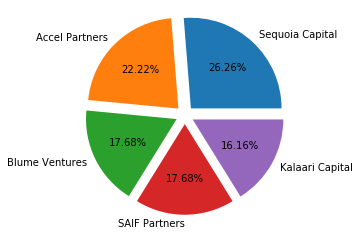

['Sequoia Capital', 'Accel Partners', 'Blume Ventures', 'SAIF Partners', 'Kalaari Capital']


In [17]:
#Plot the graph
pie=[]
labels=[]
explode=[0.1,0.1,0.1,0.1,0.1]
for x in range(5):
    pie.append(sorted_x[x][1])
    labels.append(sorted_x[x][0])
plt.pie(pie,labels=labels,explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.show()
print(labels)

# 3. The top 5 investors who have invested in different startups. 

In [18]:
#Copying the Data into other Dataframe for the analysis
data_3=data_2
data_3.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN


In [19]:
#Changing the name of the Startups
'''In the Provided Dataset there are various spelling or mistype mistake is present, so in order to handle it we need to 
deal with the name and replace it with the original name'''

data_3['StartupName']=data_3['StartupName'].replace('OyoRooms','Oyo')
data_3['StartupName']=data_3['StartupName'].replace('Oyorooms','Oyo')
data_3['StartupName']=data_3['StartupName'].replace('Oyo Rooms','Oyo')
data_3['StartupName']=data_3['StartupName'].replace('OYO Rooms','Oyo')

data_3['StartupName']=data_3['StartupName'].replace('Ola Cabs','Ola')
data_3['StartupName']=data_3['StartupName'].replace('Olacabs','Ola')

data_3['StartupName']=data_3['StartupName'].replace('Flipkart.com','Flipkart')

data_3['StartupName']=data_3['StartupName'].replace('Paytm Marketplace','Paytm')


In [20]:
#Reading the first 5 records
data_3.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN


In [21]:
#Getting the all the keys in list
keys=list(dictionary.keys())

In [22]:
#Creating the Dictionary
dict_invest={}

In [23]:
#Sample 
'''Sample Example that how we are going to check'''
e=data_3.StartupName[data_3['InvestorsName'].str.contains('Kae Capital',na=False)]=='TouchKin'
(e==True).any()

True

In [24]:
#Getting unique startups
'''Getting the name of all the unique startups'''

startup=data_3['StartupName'].unique()
startup

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'ReGlobe', 'Dazo',
       'Tradelab'], dtype=object)

In [25]:
#Getting the top 20 investors by creating the dictionary for unique startups
for i in range(10):
    '''We are not considering the Undisclosed Investors'''
    if sorted_x[i][0]=='Undisclosed':
        continue
    for j in startup:
        d=data_3.StartupName[data_3['InvestorsName'].str.contains(sorted_x[i][0],na=False)]==j
        if (d==True).any():
            if sorted_x[i][0] in dict_invest:
                dict_invest[sorted_x[i][0]]+=1
            else:
                dict_invest[sorted_x[i][0]]=0

In [26]:
#Print the Dictionary
dict_invest

{'Sequoia Capital': 43,
 'Accel Partners': 43,
 'Blume Ventures': 36,
 'SAIF Partners': 29,
 'Kalaari Capital': 34,
 'Indian Angel Network': 31,
 'Ratan Tata': 22,
 '500 Startups': 19,
 'Rajan Anandan': 19,
 'Nexus Venture Partners': 17}

In [27]:
#Sort the Dictionary on the basis of the values
sorted_x_1=sorted(dict_invest.items(), key=lambda kv: kv[1],reverse=True)
sorted_x_1

[('Sequoia Capital', 43),
 ('Accel Partners', 43),
 ('Blume Ventures', 36),
 ('Kalaari Capital', 34),
 ('Indian Angel Network', 31),
 ('SAIF Partners', 29),
 ('Ratan Tata', 22),
 ('500 Startups', 19),
 ('Rajan Anandan', 19),
 ('Nexus Venture Partners', 17)]

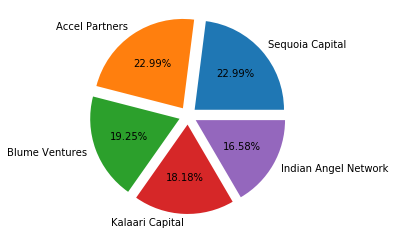

['Sequoia Capital', 'Accel Partners', 'Blume Ventures', 'Kalaari Capital', 'Indian Angel Network']


In [28]:
#Plot the graph
pie=[]
labels=[]
explode=[0.1,0.1,0.1,0.1,0.1]
for x in range(5):
    pie.append(sorted_x_1[x][1])
    labels.append(sorted_x_1[x][0])
plt.pie(pie,labels=labels,explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.show()
print(labels)

# 4. List of top 5 investorsas its investment type as Seed Funding or Crowd Funding 

In [29]:
'''In the Provided Dataset there are various spelling or mistype mistake is present, so in order to handle it we need to 
deal with the name and replace it with the original name'''

data_3['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data_3['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
data_3['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

In [30]:
#Creating the new Dataframe with the Investment type of only Seed funding or Crowd funding
data_4=data_3[(data_3['InvestmentType']=='Seed Funding') | (data_3['InvestmentType']=='Crowd Funding') ]
data_4

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN,NaN
13,13,07/07/2017,Clip App,Consumer Internet,Digital Media Video platform,Bangalore,"India Quotient, Shunwei Capital",Seed Funding,"1,000,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2184,2184,23/04/2015,Phone Warrior,Spam Call block App,NaN,New Delhi,Lightspeed Ventures,Seed Funding,NaN,Pre-Series A
2187,2187,27/04/2015,Grab,Food Logistics & Delivery,NaN,Mumbai,"Oliphans Capital, Haresh Chawla",Seed Funding,"1,000,000",NaN
2194,2194,29/04/2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,"1,000,000",NaN
2197,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN


In [31]:
#Getting Dictionary of all investors
def make_dictionary(arr):
    dictionary={}
    '''We do not need to take the Undisclosed Investors and also the investors with blank name'''
    for i in arr:
        if i=='Undisclosed Investors' or i=='Undisclosed investors' or i=='':
            continue
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                elif j.strip()!="":
                    dictionary[j.strip()]=1
    return dictionary

In [32]:
#Creating the new Dictionary
new_dict=make_dictionary(data_4['InvestorsName'])
#Print the Dictionary
new_dict

{'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 13,
 'LetsVenture': 13,
 'Anupam Mittal': 13,
 'Hetal Sonpal': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Blume Ventures': 9,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 2,
 'Ashish Gupta': 6,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 7,
 'Shunwei Capital': 1,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Venture Catalysts': 4,
 'Sourav Ganguly': 1,
 'Ankit Aditya': 1,
 'Moksh Sports Ventures': 1,
 'Fireside Ventures': 4,
 'Apurva Salarpuria': 1,
 'Sidharth Pansari': 2,
 'Sprout Capital': 1,
 '500 Startups': 11,
 'Purvi Capital': 2,
 'Rajan Anandan': 20,
 'Abhishek Gupta': 1,
 'Brigade Innovations LLP': 1,
 'TV Mohandas Pai': 8,
 'Suhail Rahman': 1,
 'Bobby Reddy': 1,
 'M George Oommen': 1,
 'Sequoia Capital': 3,
 'Gre

In [33]:
#Sort the Dictionary on the basis of the value 
sorted_x_2= sorted(new_dict.items(), key=lambda kv: kv[1],reverse=True)
sorted_x_2

[('Indian Angel Network', 24),
 ('Rajan Anandan', 20),
 ('Kunal Shah', 13),
 ('LetsVenture', 13),
 ('Anupam Mittal', 13),
 ('500 Startups', 11),
 ('Tracxn Labs', 11),
 ('Anand Chandrasekaran', 10),
 ('Aprameya Radhakrishna', 10),
 ('ah! Ventures', 10),
 ('Blume Ventures', 9),
 ('Kae Capital', 9),
 ('Mumbai Angels', 9),
 ('Sandeep Tandon', 9),
 ('Kunal Bahl', 9),
 ('TV Mohandas Pai', 8),
 ('undisclosed investors', 8),
 ('Ratan Tata', 8),
 ('Singapore Angel Network', 8),
 ('Undisclosed investor', 8),
 ('Rohit Bansal', 8),
 ('India Quotient', 7),
 ('Girish Mathrubootham', 7),
 ('YouWeCan Ventures', 7),
 ('Undisclosed', 7),
 ('Amit Gupta', 7),
 ('Ashish Gupta', 6),
 ('Amit Ranjan', 6),
 ('Vijay Shekhar Sharma', 6),
 ('Undisclosed Investor', 6),
 ('Binny Bansal', 6),
 ('Accel Partners', 6),
 ('Zishaan Hayath', 6),
 ('Quarizon', 6),
 ('Anirudh Damani', 6),
 ('Sumit Jain', 6),
 ('Unitus Seed Fund', 6),
 ('Rajesh Sawhney', 6),
 ('Rajul Garg', 5),
 ('Lead Angels', 5),
 ('Kanwaljit Singh', 5),
 

In [34]:
#Getting name of the all the unique Startups
startup_1=data_4['StartupName'].unique()
startup_1

array(['Leverage Edu', 'Zepo', 'Billion Loans', 'Minjar', 'Clip App',
       'Upwardly.in', 'Flickstree', 'Design Cafe', 'Bottr.me', 'QwikSpec',
       'Increff', 'Hypernova Interactive', 'AirCTO', 'Playablo', 'Trupay',
       'Brick2Wall', 'FableStreet', 'Monsoon Fintech', 'MonkeyBox',
       'Creator’s Gurukul', 'ThinkerBell', 'Jhakaas', 'Gympik.com',
       'Tripeur', 'wayForward', 'ZipLoan', 'GrowFitter', 'Stockal',
       'Guidoo', 'Loanmeet', 'Vista Rooms', 'Vanitycask', 'MrNeeds',
       'Fincash', 'PortDesk', 'EazyDiner', 'HealthIntel', 'ForeverShop',
       'Explore Life traveling', 'Voxweb', 'FiTraQ', 'ZippServe',
       'Sumeru', 'HealthMir', 'Uactive', 'Balance App', 'Nightstay',
       'MyGreens', 'Curie Labs', 'Uncanny Vision', 'Lucideus',
       'Fourth Ambit', 'Chymera VR', 'Book My Diamond', 'ION Energy',
       'Log 9 Materials', 'Aequm', 'Zapty', 'Vernacular.ai',
       'The Good Life', 'EzCred', 'ZipGrid', 'The Print',
       'GenNext Students', 'WhatsLoan', 'Nivesh

In [35]:
#Creating the new Dictionary
dict_invest_1={}

In [36]:
#Getting the top 20 investors by creating the dictionary for unique startups
for i in range(20):
    if (sorted_x_2[i][0]=='Undisclosed investor') or (sorted_x_2[i][0]=='undisclosed investors') :
        continue
    for j in startup_1:
        d=data_4.StartupName[data_4['InvestorsName'].str.contains(sorted_x_2[i][0],na=False)]==j
        if (d==True).any():
            if sorted_x_2[i][0] in dict_invest_1:
                dict_invest_1[sorted_x_2[i][0]]+=1
            else:
                dict_invest_1[sorted_x_2[i][0]]=0

In [37]:
#Sort by value in Dictionary
sorted_x_3=sorted(dict_invest_1.items(), key=lambda kv: kv[1],reverse=True)

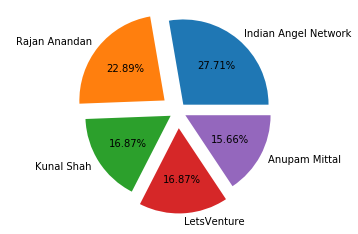

['Indian Angel Network', 'Rajan Anandan', 'Kunal Shah', 'LetsVenture', 'Anupam Mittal']


In [38]:
#Plot the graph
pie=[]
labels=[]
explode=[0.1,0.2,0.1,0.2,0.1]
for x in range(5):
    pie.append(sorted_x_3[x][1])
    labels.append(sorted_x_3[x][0])
plt.pie(pie,labels=labels,explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.show()
print(labels)

# 5. List of top 5 investorsas its investment type as Private Equity

In [39]:
'''Getting the new Dataframe with the InvestmentType as Private Equity'''

data_5=data_3[(data_3['InvestmentType']=='Private Equity') ]
data_5

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2190,2190,28/04/2015,Babajobs,Grey collar Job Board,NaN,Bangalore,SEEK Ltd & affiliates,Private Equity,"10,000,000",Series B
2191,2191,28/04/2015,Urban Ladder,Online Furniture ecommerce,NaN,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,NaN,Series D
2193,2193,28/04/2015,Naaptol.com,Tele-Shopping / eCommerce,NaN,Mumbai,Mitsui & Co & existing investors,Private Equity,"21,500,000",Series C
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A


In [40]:
#Getting Dictionary of all investors
def make_dictionary(arr):
    dictionary={}
    for i in arr:
        '''We are not considering the Undisclosed Investors or the investors with blank name'''
        if i=='Undisclosed Investors' or i=='Undisclosed investors' or i=='':
            continue
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                elif j.strip()!="":
                    dictionary[j.strip()]=1
    return dictionary

In [41]:
#Making the new Dictionary
new_dict_1=make_dictionary(data_5['InvestorsName'])
#Print the Dictionary
new_dict_1

{'Kae Capital': 9,
 'Triton Investment Advisors': 1,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 28,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 38,
 'Jungle Ventures': 7,
 'Shailesh Rao': 1,
 'Venture Highway': 2,
 'BCCL': 1,
 'SBI-FMO Fund': 1,
 'Bessemer Venture Partners': 13,
 'Catamaran Ventures': 3,
 'Blacksoil Capital Pvt. Ltd': 1,
 'One97 Communication Ltd': 1,
 'ain Capital Ventures': 1,
 'Renaud Laplanche': 1,
 'Stellaris Venture Partners': 3,
 'Tencent Holdings': 3,
 'Goldman Sachs': 5,
 'HBM Healthcare Investments': 2,
 'Maverick Capital Ventures': 2,
 'Sequoia India': 12,
 'Omidyar Network and Kae Capital': 1,
 'Info Edge (India) Ltd': 8,
 'TVS Motor Company': 1,
 'Emerging India': 1,
 'blockchain ecosystem Global Advisors': 1,
 'Horseferry': 1,
 'Blume Ventures': 26,
 'Indian Angel Network': 7,
 'Kunal Shah': 3,
 'Sandeep Tandon': 4,
 '500 Startups': 9,
 'IvyCap Vent

In [42]:
#Sort on the basis of the values
sorted_x_4 = sorted(new_dict_1.items(), key=lambda kv: kv[1],reverse=True)
sorted_x_4

[('Sequoia Capital', 49),
 ('Accel Partners', 38),
 ('SAIF Partners', 30),
 ('Kalaari Capital', 28),
 ('Blume Ventures', 26),
 ('Nexus Venture Partners', 18),
 ('Tiger Global', 17),
 ('Ratan Tata', 15),
 ('Omidyar Network', 14),
 ('Bessemer Venture Partners', 13),
 ('Sequoia India', 12),
 ('IDG Ventures', 11),
 ('Tiger Global Management', 11),
 ('India Quotient', 10),
 ('Lightspeed Venture Partners', 10),
 ('Kae Capital', 9),
 ('500 Startups', 9),
 ('Norwest Venture Partners', 9),
 ('Trifecta Capital', 9),
 ('Helion Venture Partners', 9),
 ('Helion Ventures', 9),
 ('Info Edge (India) Ltd', 8),
 ('Matrix Partners', 8),
 ('Orios Venture Partners', 8),
 ('Qualcomm Ventures', 8),
 ('Unitus Seed Fund', 8),
 ('RoundGlass Partners', 8),
 ('Jungle Ventures', 7),
 ('Indian Angel Network', 7),
 ('Nandan Nilekani', 7),
 ('Times Internet', 7),
 ('Axilor Ventures', 7),
 ('IDG Ventures India', 7),
 ('Brand Capital', 7),
 ('Flipkart', 7),
 ('Mumbai Angels', 7),
 ('Beenext', 6),
 ('Beenos', 6),
 ('M&S

In [43]:
#Unique Startups
startup_2=data_5['StartupName'].unique()
startup_2

array(['TouchKin', 'Ethinos', 'Droom', 'Jumbotail', 'Moglix',
       'Timesaverz', 'Innoviti', 'Chumbak', 'MObiquest', 'Rentomojo',
       'Noticeboard', 'Byju’s', 'Fab Hotels', '1mg', 'BigStylist',
       'RentOnGo', 'Goomo', 'MaxMyWealth', 'Spinny', 'Ftcash',
       'BHIVE Workspace', 'GyanDhan', 'Hungry Foal', 'ABI Health',
       'Boxx.ai', 'PeeSafe.in', 'CoverFox', 'HyperTrack', 'Goodera',
       'Digit', 'Ola', 'MoneyTap', 'Goodbox', 'Unbxd', 'Insider.in',
       'Fynd', 'Grow Fit', 'mSwipe', 'OneAssist', 'Julia Computing',
       'Kissht', 'Loantap', 'Flipkart', 'V Resorts', 'Stashfin',
       'Formcept', 'Rubique', 'Niki.ai', 'Fitpass', 'ZingHR',
       'Tagos Design', 'UrbanClap', 'Power2SME', '4tigo', 'SMECorner',
       'Healthians', 'YepMe', 'Ace Turtle', 'CureFit', 'Sequretek',
       'Vidooly', 'Shopclues', 'Legal Raasta', 'Remit Guru', 'Telr',
       'Paysense', 'Paytm', 'Delhivery', 'Magicpin', 'Box8',
       'Aye Finance', 'Collateral Medical', 'Supr Daily', 'Swiggy',


In [44]:
#Creating the new Dictionary
dict_invest_2={}

In [45]:
#Getting the top 20 investors by creating the dictionary for unique startups
for i in range(20):
    '''Removing the Undisclosed investor'''
    if (sorted_x_4[i][0]=='Undisclosed investor') or (sorted_x_4[i][0]=='undisclosed investors') :
        continue
    for j in startup_2:
        d=data_5.StartupName[data_5['InvestorsName'].str.contains(sorted_x_4[i][0],na=False)]==j
        if (d==True).any():
            if sorted_x_4[i][0] in dict_invest_2:
                dict_invest_2[sorted_x_4[i][0]]+=1
            else:
                dict_invest_2[sorted_x_4[i][0]]=0

In [46]:
sorted_x_5=sorted(dict_invest_2.items(), key=lambda kv: kv[1],reverse=True)

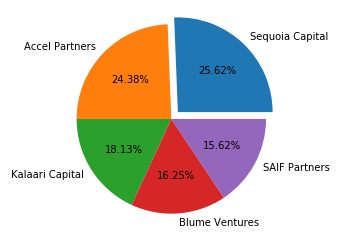

['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'Blume Ventures', 'SAIF Partners']


In [47]:
#Plotting the graph
pie=[]
labels=[]
explode=[0.1,0,0,0,0]
for x in range(5):
    pie.append(sorted_x_5[x][1])
    labels.append(sorted_x_5[x][0])
plt.pie(pie,labels=labels,explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.show()
print(labels)